In [30]:
### ---- Import Libraries ---- ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.colors as col

In [31]:
### ---- Read Data Files and Make a 3rd Data File ---- ###

# Read in training data csv file and check head
w_Train = pd.read_csv("trainingData.csv", sep=",")
w_Validate = pd.read_csv("validationData.csv", sep=",")

In [32]:
r_Train = w_Train.copy() #(19937, 529)
r_Validate = w_Validate.copy() #(1111, 529)

In [33]:
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = r_Train.loc[r_Train['BUILDINGID'] == 0]
building_1 = r_Train.loc[r_Train['BUILDINGID'] == 1]
building_2 = r_Train.loc[r_Train['BUILDINGID'] == 2]


building_0_val = r_Validate.loc[r_Validate['BUILDINGID'] == 0]
building_1_val = r_Validate.loc[r_Validate['BUILDINGID'] == 1]
building_2_val = r_Validate.loc[r_Validate['BUILDINGID'] == 2]

In [34]:
### ---- Filtering on Floor Number for each building ---- ###

# Now filter by Floor Number - later this will be put in a Get_Floor function

###### TRAINING SET ONLY

## Buiding 0: 
b0_f0 = building_0.loc[building_0['FLOOR'] == 0]
b0_f1 = building_0.loc[building_0['FLOOR'] == 1]
b0_f2 = building_0.loc[building_0['FLOOR'] == 2]
b0_f3 = building_0.loc[building_0['FLOOR'] == 3]

## Buiding 1: 
b1_f0 = building_1.loc[building_1['FLOOR'] == 0]
b1_f1 = building_1.loc[building_1['FLOOR'] == 1]
b1_f2 = building_1.loc[building_1['FLOOR'] == 2]
b1_f3 = building_1.loc[building_1['FLOOR'] == 3]
b1_f4 = building_1.loc[building_1['FLOOR'] == 4]

## Buiding 2: 
b2_f0 = building_2.loc[building_2['FLOOR'] == 0]
b2_f1 = building_2.loc[building_2['FLOOR'] == 1]
b2_f2 = building_2.loc[building_2['FLOOR'] == 2]
b2_f3 = building_2.loc[building_2['FLOOR'] == 3]
b2_f4 = building_2.loc[building_2['FLOOR'] == 4]

###### VALIDATION SET ONLY

## Buiding 0: 
b0_f0_val = building_0_val.loc[building_0_val['FLOOR'] == 0]
b0_f1_val = building_0_val.loc[building_0_val['FLOOR'] == 1]
b0_f2_val = building_0_val.loc[building_0_val['FLOOR'] == 2]
b0_f3_val = building_0_val.loc[building_0_val['FLOOR'] == 3]

## Buiding 1: 
b1_f0_val = building_1_val.loc[building_1_val['FLOOR'] == 0]
b1_f1_val = building_1_val.loc[building_1_val['FLOOR'] == 1]
b1_f2_val = building_1_val.loc[building_1_val['FLOOR'] == 2]
b1_f3_val = building_1_val.loc[building_1_val['FLOOR'] == 3]
b1_f4_val = building_1_val.loc[building_1_val['FLOOR'] == 4]

## Buiding 2: 
b2_f0_val = building_2_val.loc[building_2_val['FLOOR'] == 0]
b2_f1_val = building_2_val.loc[building_2_val['FLOOR'] == 1]
b2_f2_val = building_2_val.loc[building_2_val['FLOOR'] == 2]
b2_f3_val = building_2_val.loc[building_2_val['FLOOR'] == 3]
b2_f4_val = building_2_val.loc[building_2_val['FLOOR'] == 4]

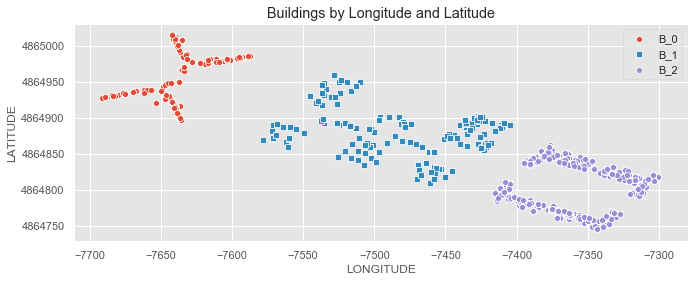

In [64]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_0, marker = "o", label = "B_0") # Can specify which floors using operators
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_1, marker = "s", label = "B_1")
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_2, marker = "o", label = "B_2")
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")
plt.savefig("Building LONG LAT.png")


In [65]:
b2 = building_2.drop_duplicates()


In [66]:
b2_val = building_2_val.drop_duplicates()


In [67]:
## Recall the columns names and data types for the r_Train 

print(b2.columns)

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)


In [68]:
## Recall the columns names and data types for the r_Validate 

print(b2_val.columns)

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)


In [69]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Train = b2.copy(); 
#c_Train.shape; c_Train.columns

In [70]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Val = b2_val.copy();
#c_Val.shape; c_Val.columns

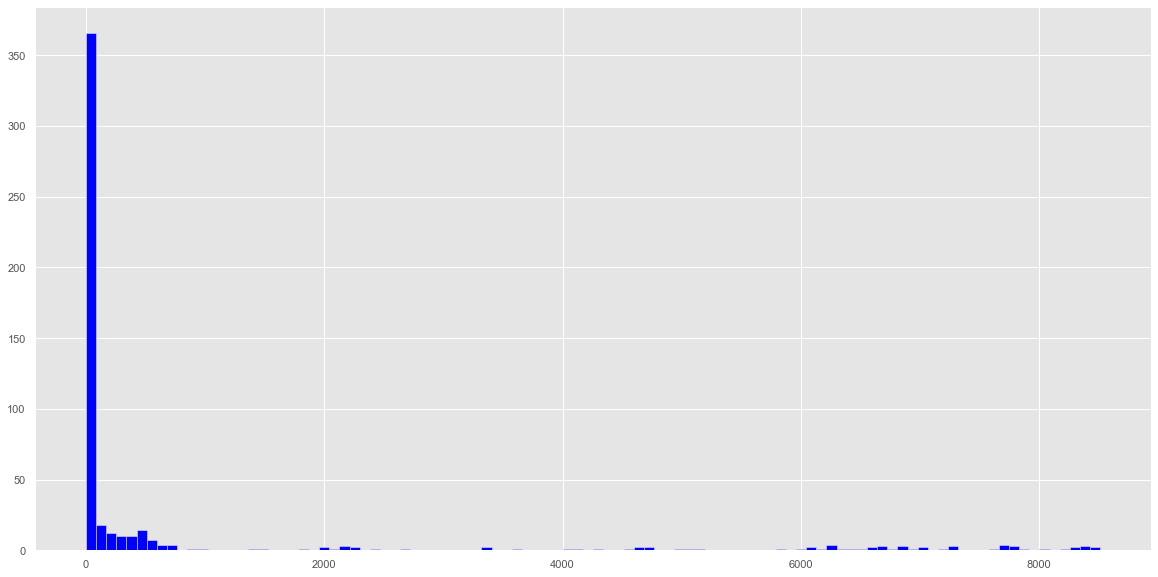

In [71]:
#### ---- Visualisation of WAPS using original table shape ---- ####

c_Train.iloc[:,0:520].var().hist(color="blue", bins = 100)




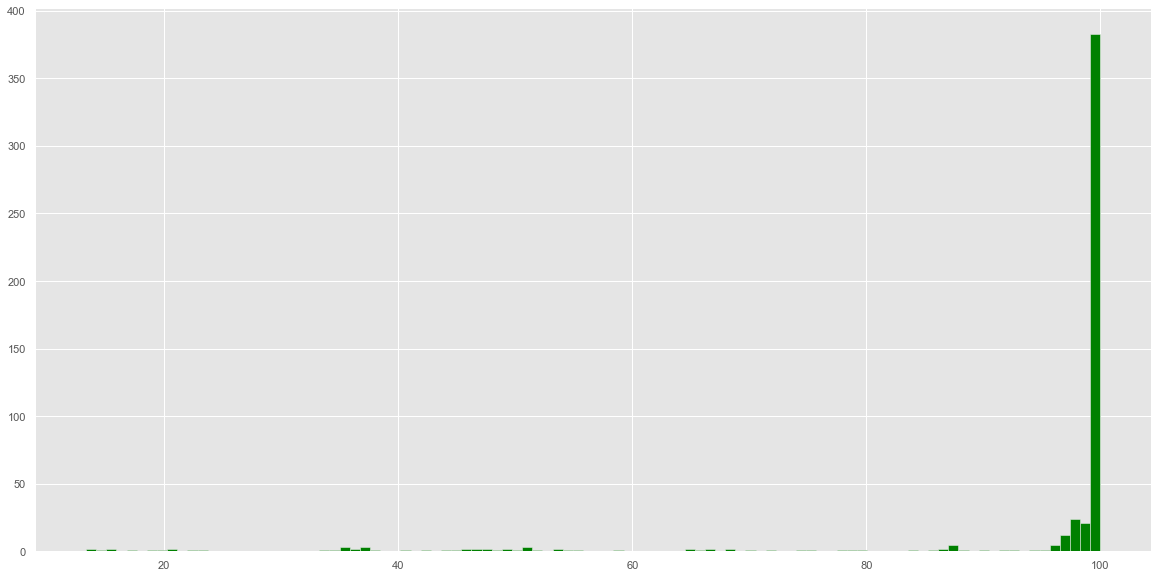

In [72]:
c_Train.iloc[:,0:520].mean().hist(color="green", bins = 100)

In [73]:
#### ---- FILTERING OUT THE BAD DATA FROM WAPS ---- ####
#c_Train.filter(regex='^WAP',axis=0).var != 0

In [74]:
## Here I am changing the data type of the column names from Index to List

wap_names = c_Train.columns[0:520].tolist()
wap_names_val = c_Val.columns[0:520].tolist()

In [75]:
## Here I am making a filter of any rows in which there is 100% lack of variance
## This would indicate that I am picking up WAPs that are working okay
t_var_0 = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) == 0,:].copy()  
t_var_1 = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) != 0,:].copy()
#c_Train.shape
#t_var_1.shape
t_var_1.shape

(9078, 529)

In [76]:
## Here I am making a filter of any rows in which there is 100% lack of variance
## This would indicate that I am picking up WAPs that are working okay
v_var_0 = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) == 0,:].copy()  
v_var_1 = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) != 0,:].copy()
#c_Train.shape
v_var_1.shape
#v_var_0.shape

(268, 529)

In [77]:
##### ---- LOOKING AT DATA DISTRIBUTIONS ACROSS MAIN COLUMNS

import matplotlib.pyplot as plt
%matplotlib inline
#Display figures in Jupyter notebook
import seaborn as sns # Better than MPL for statistical visualisation
sns.set(rc={'figure.figsize':(11,4)})

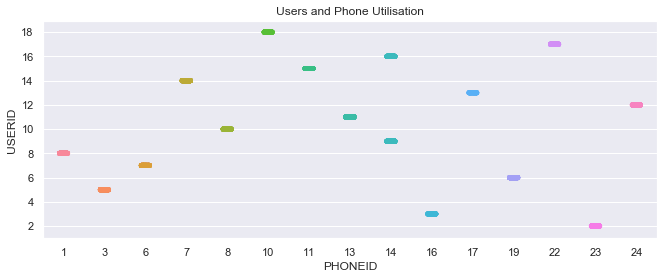

In [78]:
## Plot to get an idea of how the phones and the users are distributed

x = t_var_1['PHONEID']
y = t_var_1['USERID']

sns.stripplot(x, y, data = v_var_1, cmap="colorblind")
plt.title("Users and Phone Utilisation")
plt.savefig("User by Phone B2 LAT.png")
#sns.scatterplot(ctl_normal['PHONEID'], ctl_normal['USERID'], data = ctl_normal, hue="Signal", marker='o', size= 'ctl''Signal')

In [50]:
t_var_1.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [51]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES  ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = (t_var_1.iloc[:, 0:520]) # Independent variable
y = (t_var_1.loc[:, "LATITUDE"]) #  Target column
#X.shape
#y.shape



In [52]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
#### ---- ERROR METRICS FOR REGRESSION ---- ####

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [54]:
#### ----  REGRESSION 1: GRADIENT BOOSTED TREES ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import GradientBoostingRegressor

## Fitting Linear Regression to the Training Set
gbt_reg = GradientBoostingRegressor()
gbt_reg.fit(X_train, y_train)


## Predicting the Test set results
y_pred = gbt_reg.predict(X_test)

In [55]:
## Assigning error metrics

mse_gbt = round(mean_squared_error(y_test, y_pred), 4)
rmse_gbt = round(np.sqrt(mse_gbt), 4)
mae_gbt = round(mean_absolute_error(y_test, y_pred), 4)
r2_gbt = round(r2_score(y_test, y_pred), 4)

In [56]:
## Printing out errors in DataFrame format

model_name = "Gradient Boosted Trees"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
    f"-----------------------------------------------------\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse_gbt,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse_gbt,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae_gbt,
      "\n\n", f"The Correlation (r2) is:\n",r2_gbt,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Gradient Boosted Trees 

-----------------------------------------------------

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 66.3364 

 The Root Mean Squared Error (RMSE) is:
 8.1447 

 The Mean Absolute Error (MAE) is:
 6.158 

 The Correlation (r2) is:
 0.9185 

 -----------------------------------------------------



In [57]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual


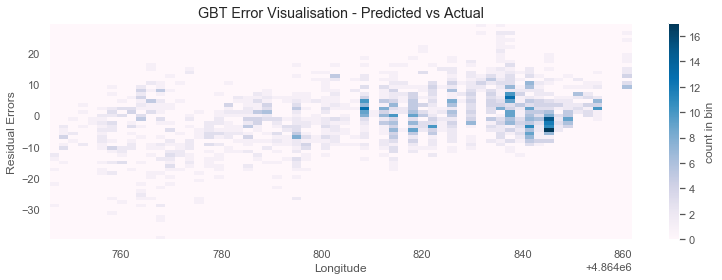

In [58]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("GBT Error Plt.png")
plt.savefig("GBT Error Plt B2 LAT.png")

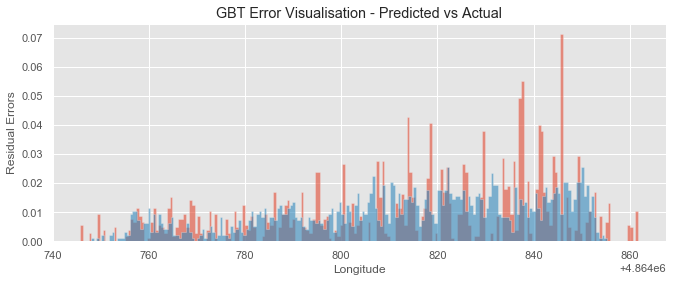

In [59]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")


plt.savefig("GBT Error Hist B2 LAT.png")

In [32]:
#### ----  REGRESSION 2: RANDOM FOREST ---- ###

from sklearn.ensemble import RandomForestRegressor

## Fitting Linear Regression to the Training Set
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = rf_reg.predict(X_test)

In [33]:
#### ---- ERROR METRICS FOR REGRESSION ---- ####

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [34]:

## Assigning error metrics

mse_rf = round(mean_squared_error(y_test, y_pred), 4)
rmse_rf = round(np.sqrt(mse_rf), 4)
mae_rf = round(mean_absolute_error(y_test, y_pred), 4)
r2_rf = round(r2_score(y_test, y_pred), 4)

In [35]:
## Printing out errors in DataFrame format

model_name = "Random Forest"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
    f"-----------------------------------------------------\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse_rf,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse_rf,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae_rf,
      "\n\n", f"The Correlation (r2) is:\n",r2_rf,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Random Forest 

-----------------------------------------------------

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 23.3045 

 The Root Mean Squared Error (RMSE) is:
 4.8275 

 The Mean Absolute Error (MAE) is:
 2.566 

 The Correlation (r2) is:
 0.9714 

 -----------------------------------------------------



In [36]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual



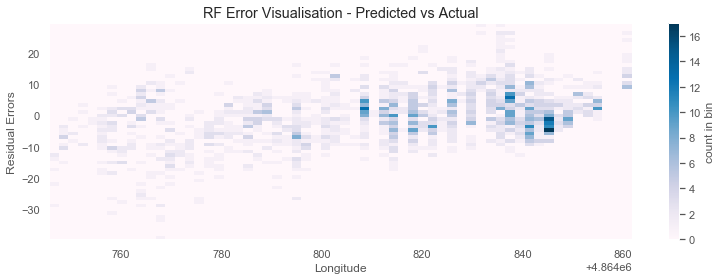

In [60]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("RF Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("Random Forest Error Plt B2 LAT.png")

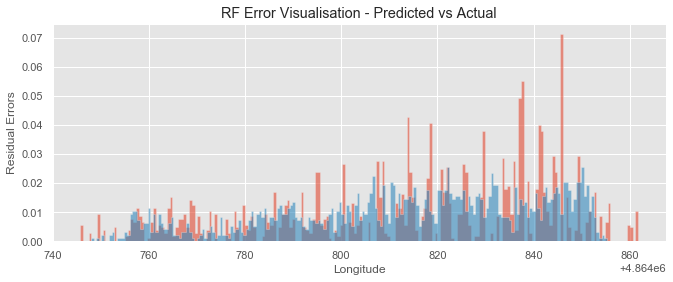

In [61]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("RF Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")


plt.savefig("Random Forest Error Hist B2 LAT.png")

In [39]:
#### ----  REGRESSION 3: SUPPORT VECTOR MACHINE ---- ###

from sklearn.svm import LinearSVR

## Fitting Linear Regression to the Training Set

svr_reg = LinearSVR(
            C=50,
            fit_intercept=True,
            intercept_scaling=1.0,
            dual=True,
            verbose=0,
            random_state=42,
            max_iter=1000,
            )

svr_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = svr_reg.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
#### ---- ERROR METRICS FOR REGRESSION ---- ####

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [41]:

## Assigning error metrics

mse_svm = round(mean_squared_error(y_test, y_pred), 4)
rmse_svm = round(np.sqrt(mse_svm), 4)
mae_svm = round(mean_absolute_error(y_test, y_pred), 4)
r2_svm = round(r2_score(y_test, y_pred), 4)

In [42]:
## Printing out errors in DataFrame format

model_name = "Support Vector Machine"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
    f"-----------------------------------------------------\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse_svm,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse_svm,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae_svm,
      "\n\n", f"The Correlation (r2) is:\n",r2_svm,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Support Vector Machine 

-----------------------------------------------------

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 500384.746 

 The Root Mean Squared Error (RMSE) is:
 707.3788 

 The Mean Absolute Error (MAE) is:
 30.3292 

 The Correlation (r2) is:
 -613.4846 

 -----------------------------------------------------



In [43]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual



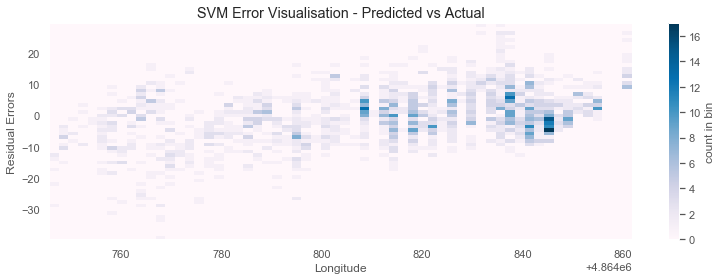

In [62]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("SVM Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("Support Vector Machine Error Plt B2 LAT.png")

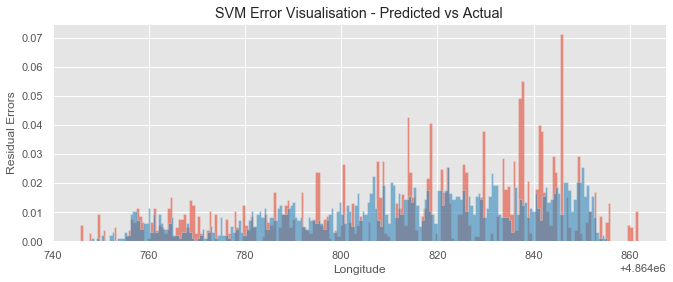

In [63]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("SVM Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")


plt.savefig("Support Vector Machine Error Hist B2 LAT.png")

In [46]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df = pd.DataFrame(
    { "Mean Squared Error" : [mse_gbt, mse_rf, mse_svm],
      "Root Mean Squared Error" : [rmse_gbt, rmse_rf, rmse_svm],
      "Mean Absolute Error" : [mae_gbt, mae_rf, mae_svm],
      "Correlation (R2)" : [r2_gbt, r2_rf, r2_svm]},
     index = ["GBT", "RF", "SVM"])

error_df

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Correlation (R2)
GBT,66.3227,8.1439,6.1540,0.9186
RF,23.3045,4.8275,2.5660,0.9714
SVM,500384.7460,707.3788,30.3292,-613.4846


In [47]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES - MODEL WISE COLUMNS ---- ####
error_df2 = pd.DataFrame(
    { "Gradient Boosted Tree" : [mse_gbt, mae_gbt, rmse_gbt, r2_gbt],
      "Random Forest" : [mse_rf, mae_rf, rmse_rf, r2_rf],
     "Support Vector Machine" : [mse_svm, mae_svm, rmse_svm, r2_svm]},
     index = ["Mean Squared Error", "Mean Anbsolute Error", "Root Mean Squared Error", "Correlation"])
   
error_df2

,Gradient Boosted Tree,Random Forest,Support Vector Machine
Mean Squared Error,66.3227,23.3045,500384.7460
Mean Anbsolute Error,6.1540,2.5660,30.3292
Root Mean Squared Error,8.1439,4.8275,707.3788
Correlation,0.9186,0.9714,-613.4846
